# Módulos y librerías a utilizar

In [5]:
# Importación de bibliotecas necesarias
import selenium 
from selenium import webdriver  # Importación de Selenium y sus módulos necesarios
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass as gp  # Importación de getpass para ocultar la contraseña
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import socket
import re
import tcp_latency
import time
import seaborn as sns  # Importación de Seaborn para visualización de datos
import datetime
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, StaleElementReferenceException, MoveTargetOutOfBoundsException, NoSuchElementException, ElementClickInterceptedException, StaleElementReferenceException

In [6]:
# Lectura de datos desde el archivo Excel "tweets_pullaro.xlsx" y carga en un DataFrame de Pandas
df = pd.read_excel("C:/Users/Felipe Ojalvo/Desktop/Data analytics/Data scrapping Twitter/Pullaro/tweets_pullaro.xlsx")


Estableciendo la ruta al controlador de Chrome (ChromeDriver) y luego inicializando un navegador Chrome utilizando Selenium

In [3]:
# Definición de la ruta al controlador de Chrome (ChromeDriver)
ruta_driver = "tu ruta al controlador de chrome"

# Inicialización del navegador Chrome utilizando Selenium
bot = webdriver.Chrome(service = Service("tu ruta al navegador chrome desde Selenium")) #webdriver.Chrome(service= Service


In [4]:
# Navegación a la página de inicio de sesión de Twitter
bot.get("https://twitter.com/login")

In [6]:
#Ingresar password
bot.find_element('xpath', '//input[@class="r-30o5oe r-1dz5y72 r-13qz1uu r-1niwhzg r-17gur6a r-1yadl64 r-deolkf r-homxoj r-poiln3 r-7cikom r-1ny4l3l r-t60dpp r-fdjqy7"]').send_keys("felipe_oja46737")

#clickear en login
time.sleep(5)
bot.find_element('xpath', '//div[@class="css-175oi2r r-sdzlij r-1phboty r-rs99b7 r-lrvibr r-ywje51 r-usiww2 r-13qz1uu r-2yi16 r-1qi8awa r-ymttw5 r-1loqt21 r-o7ynqc r-6416eg r-1ny4l3l"][@style="border-color: rgba(0, 0, 0, 0); background-color: rgb(15, 20, 25);"]//span[text()="Next"]').click()
time.sleep(5)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//div[@class="css-175oi2r r-sdzlij r-1phboty r-rs99b7 r-lrvibr r-ywje51 r-usiww2 r-13qz1uu r-2yi16 r-1qi8awa r-ymttw5 r-1loqt21 r-o7ynqc r-6416eg r-1ny4l3l"][@style="border-color: rgba(0, 0, 0, 0); background-color: rgb(15, 20, 25);"]//span[text()="Next"]"}
  (Session info: chrome=123.0.6312.58)
Stacktrace:
	GetHandleVerifier [0x00EE8D03+51395]
	(No symbol) [0x00E55F61]
	(No symbol) [0x00D0E13A]
	(No symbol) [0x00D462BB]
	(No symbol) [0x00D463EB]
	(No symbol) [0x00D7C162]
	(No symbol) [0x00D63ED4]
	(No symbol) [0x00D7A570]
	(No symbol) [0x00D63C26]
	(No symbol) [0x00D3C629]
	(No symbol) [0x00D3D40D]
	GetHandleVerifier [0x012668D3+3712147]
	GetHandleVerifier [0x012A5CBA+3971194]
	GetHandleVerifier [0x012A0FA8+3951464]
	GetHandleVerifier [0x00F99D09+776393]
	(No symbol) [0x00E61734]
	(No symbol) [0x00E5C618]
	(No symbol) [0x00E5C7C9]
	(No symbol) [0x00E4DDF0]
	BaseThreadInitThunk [0x764A7BA9+25]
	RtlInitializeExceptionChain [0x7730BDAB+107]
	RtlClearBits [0x7730BD2F+191]


## Proceso de extracción de tweets

In [27]:
# Búsqueda del elemento en la página web utilizando XPath y obtención de su texto
linea = bot.find_elements('xpath', '//div[@data-testid="cellInnerDiv"]')[0].text

In [28]:
# Cargar el modelo de lenguaje de spaCy
nlp = spacy.load("es_core_news_sm")

In [33]:
def procesar_linea(linea):
    # Analizar la línea de texto con spaCy
    doc = nlp(linea)
    
    # Inicializar las variables
    nombre = usuario = tweet_texto = hora_publicacion = fecha_tweet = vistos = cant_respuestas = cant_retweets = cant_likes = cant_guardados = ""
    
    # Extraer el nombre
    nombre_end = linea.find('\n')
    nombre_val = linea[:nombre_end]
    
    # Extraer el nombre de usuario
    usuario_start = nombre_end + 1
    usuario_end = linea.find('\n', usuario_start)
    usuario_val = linea[usuario_start:usuario_end]
    
    # Extraer el texto del tweet
    tweet_texto_start = usuario_end + 1
    tweet_texto_end = linea.find('ranslate post\n') - 2
    tweet_texto_val = linea[tweet_texto_start:tweet_texto_end]
    
    # Extraer la hora de publicación
    hora_publicacion_start = tweet_texto_end + 1  # Ajuste aquí
    hora_publicacion_end = linea.find(' ·')
    hora_publicacion_str = linea[hora_publicacion_start:hora_publicacion_end]
    # Buscar la hora en el texto utilizando una expresión regular
    import re
    hora_publicacion_val = re.search(r'\d+:\d+\s(?:AM|PM)', hora_publicacion_str).group(0)
    
    # Extraer la fecha del tweet
    fecha_tweet_start = hora_publicacion_end + 3
    fecha_tweet_end = linea.find('\n', fecha_tweet_start)
    fecha_tweet_val = linea[fecha_tweet_start:fecha_tweet_end]
    
    # Extraer el número de vistas
    vistos_start = fecha_tweet_end + 3
    vistos_end = linea.find('\n Views')
    vistos_val = linea[vistos_start:vistos_end]
      
    # Extraer el número de respuestas
    respuestas_start = vistos_end + 1
    respuestas_end = linea.find('\n', respuestas_start)
    cant_respuestas_val = linea[respuestas_start:respuestas_end]
    
# Extraer el número de retweets
    retweets_start = respuestas_end + 1
    retweets_end = linea.find('\n', retweets_start)
    cant_retweets_val = linea[retweets_start:retweets_end]
    
    # Extraer el número de likes
    likes_start = retweets_end + 1
    likes_end = linea.find('\n', likes_start)
    cant_likes_val = linea[likes_start:likes_end]
    
    # Extraer el número de guardados
    guardados_start = likes_end + 1
    guardados_end = linea.find('\n', guardados_start)
    cant_guardados_val = linea[guardados_start:guardados_end]
    
    # Crear la lista de datos
    datos = [nombre_val, usuario_val, tweet_texto_val, hora_publicacion_val, fecha_tweet_val, vistos_val, cant_respuestas_val, cant_retweets_val, cant_likes_val, cant_guardados_val]
    
    return datos

# Línea de texto introducida manualmente

# Procesar la línea introducida manualmente
datos = procesar_linea(linea)

print(datos)



['Data Diario', '@DataDiario', ' DOCENTE CRUZÓ A PULLARO\n\n En la localidad de Casilda, provincia de Santa Fe, le reclamaron al gobernador por los sueldos de los docentes\n\n "Nos estamos cagand* de hambre"', '4:01 PM', 'Mar 20, 2024', '10K', ' Views', '9', '121', '173']


In [34]:
# Añadir los nuevos datos como una nueva fila al DataFrame "tweets_pullaro.xlsx"
df.loc[len(df)] = datos

In [13]:
# Importación de Matplotlib para visualizaciones
import matplotlib.pyplot as plt 
# Importación de WordCloud para generar nubes de palabras
from wordcloud import WordCloud  
# Importación de Counter para contar elementos en una lista
from collections import Counter  
# Importación de SentimentIntensityAnalyzer de VaderSentiment para análisis de sentimientos
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  
# Importación de NetworkX para análisis de redes
import networkx as nx  

In [14]:
df

,Nombre,Nombre_usuario,Tweet_texto,Hora_publicación,Fecha_tweet,vistos,cant_respuestas,cant_retweets,cant_likes,cant_guardados
0,ANTI TANOS,@GastonTorresV,"claro, o sea digamos, el problema narco de Ros...",3:04 PM,"Mar 14, 2024",745,S/D,2,1,8
1,Antonio,@Antonio42815042,Mmm....no le creo nada a este ladino. Para mi ...,8:37 PM,"Mar 13, 2024",15,S/D,1,1,S/D
2,Fernando Schneider,@fersch73,@NickyMarquez1\n lo de este sujeto es un acto ...,8:36 PM,"Mar 13, 2024",29,S/D,1,1,S/D
3,Ele,@mareco2014,"Que ayer , Eduardo Feinman , tiro millones de ...",7:27 PM,"Mar 13, 2024",53,S/D,1,1,1
4,InfoPlatense,@InfoPlatensetw,El gobernador Axel Kicillof ofreció al goberna...,5:56 PM,"Mar 13, 2024",558,S/D,1,1,1
...,...,...,...,...,...,...,...,...,...,...
562,georginapaz,@georgigio22,votaron en contra de desmantelar bandas crimin...,8:44 PM,"Mar 10, 2024",15,S/D,1,S/D,NaN
563,ᖶᗁᕩᕓᓍᓿᖱ,@LucisLux7,"Pullaro siempre pone cara de preocupado, pero ...",8:28 PM,"Mar 9, 2024",33,S/D,S/D,S/D,S/D
564,GABRIELA SORIA,@LAGABYSORIA,Quisiera saber las acciones del hoy gobernador...,8:27 PM,"Mar 9, 2024",161,S/D,S/D,S/D,S/D
565,Luciano,@Dynatac,"@maxipullaro\n @pablojavkin\n Pullaro, date un...",8:27 PM,"Mar 9, 2024",48,S/D,1,S/D,NaN


In [15]:
# Arreglar fechas
df['Fecha_tweet'] = pd.to_datetime(df['Fecha_tweet'], format='%b %d, %Y')

In [16]:
# Función para limpiar el texto y eliminar conectores de texto
def limpiar_texto(texto):
    # Definir la lista de conectores de texto a excluir
    conectores = ['a', 'pullaro','pero','una','todo','más','e',
                  'se','le','su','si','lo','los','las','un',
                  'al','q','del','que','el','y','la', 
                  'ante', 'bajo', 'con', 'contra', 'de', 
                  'desde', 'en', 'entre', 'hacia', 'hasta', 'para', 
                  'por', 'según', 'sin', 'sobre', 'tras', 'durante',
                  'mediante', 'excepto', 'salvo', 'incluso', 'mientras', 'versus']
     
     # Convertir el texto a minúsculas
    texto = texto.lower()
    
    # Eliminar conectores de texto
    for conector in conectores:
        # Utilizar expresiones regulares para encontrar el conector en el texto
        texto = re.sub(r'\b' + conector + r'\b', '', texto)
    
    return texto

In [17]:
# Filtrar los tweets que contienen la palabra clave "Losada"
tweets_pullaro = df[df['Tweet_texto'].str.contains('Pullaro', case=False)]

In [18]:
# Limpiar el texto de los tweets para eliminar conectores de texto
tweets_limpios = tweets_pullaro['Tweet_texto'].apply(limpiar_texto)

In [19]:
# Unir todos los tweets limpios en un solo texto
texto_completo = ' '.join(tweets_limpios)

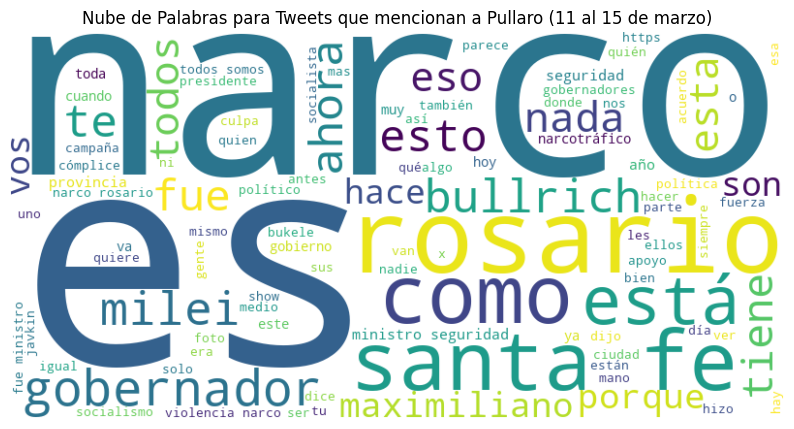

In [20]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(texto_completo)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de Palabras para Tweets que mencionan a Pullaro (11 al 15 de marzo)')
plt.axis('off')
plt.show()

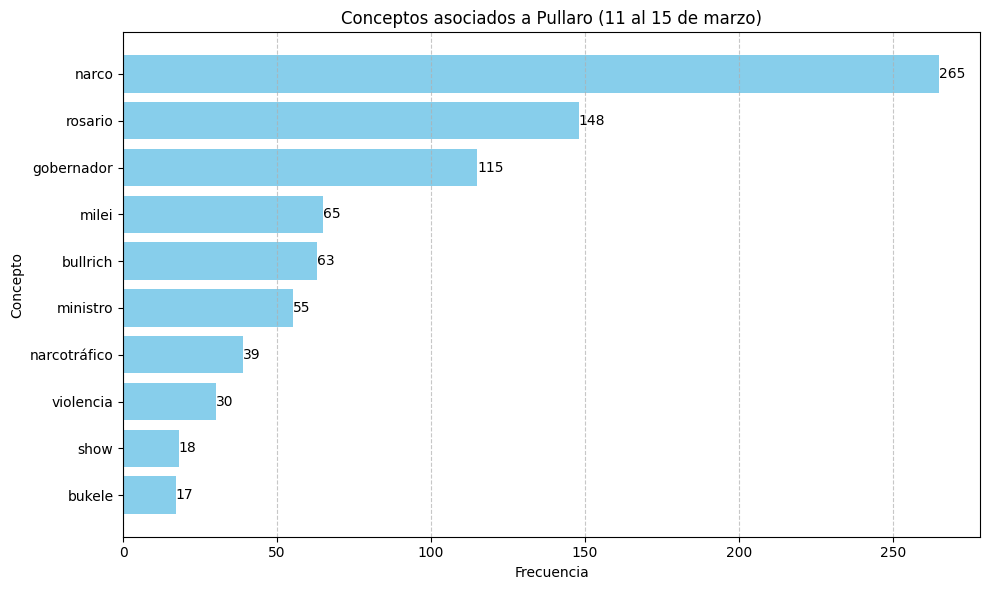

In [21]:
# Función para procesar el texto y extraer conceptos asociados a "Losada"
def encontrar_conceptos(tweet_text):
    # Lista de palabras relevantes que queremos buscar
    conceptos = ['narco', 'rosario', 'milei','bullrich','gobernador',
                 'bukele','violencia','narcotráfico','ministro','show']  # Aquí puedes agregar más conceptos si es necesario

    # Inicializar un contador para contar la frecuencia de cada concepto
    contador_conceptos = Counter()

    # Convertir el texto a minúsculas para facilitar la búsqueda
    tweet_text = tweet_text.lower()

    # Buscar cada concepto en el texto y contar su frecuencia
    for concepto in conceptos:
        # Utilizar expresiones regulares para encontrar el concepto en el texto
        matches = re.findall(concepto.lower(), tweet_text)
        # Incrementar el contador si se encuentra el concepto
        contador_conceptos[concepto] += len(matches)

    return contador_conceptos

# Procesar la columna "tweet_texto" para encontrar los conceptos asociados a "Losada"
conceptos_por_tweet = df['Tweet_texto'].apply(encontrar_conceptos)

# Contar la frecuencia total de cada concepto
frecuencia_total_conceptos = Counter()
for contador in conceptos_por_tweet:
    frecuencia_total_conceptos += contador

# Seleccionar los cuatro conceptos más comunes asociados a "Losada"
cuatro_conceptos_mas_comunes = frecuencia_total_conceptos.most_common(10)

# Extraer los nombres de los conceptos y sus frecuencias
nombres_conceptos = [concepto[0] for concepto in cuatro_conceptos_mas_comunes]
frecuencias_conceptos = [concepto[1] for concepto in cuatro_conceptos_mas_comunes]

# Ordenar los conceptos y las frecuencias de forma ascendente
nombres_conceptos_sorted, frecuencias_conceptos_sorted = zip(*sorted(zip(nombres_conceptos, frecuencias_conceptos), key=lambda x: x[1], reverse=False))

# Crear el gráfico de barras horizontales con etiquetas de datos
plt.figure(figsize=(10, 6))
bars = plt.barh(nombres_conceptos_sorted, frecuencias_conceptos_sorted, color='skyblue')
plt.title('Conceptos asociados a Pullaro (11 al 15 de marzo)')
plt.xlabel('Frecuencia')
plt.ylabel('Concepto')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Agregar etiquetas de datos a las barras
for bar, frecuencia in zip(bars, frecuencias_conceptos_sorted):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(frecuencia), ha='left', va='center', color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [22]:
# Función para analizar el sentimiento de un texto y devolver la polaridad
def analizar_sentimiento(texto):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(texto)
    if sentiment['compound'] >= 0.05:
        return 'Positivo'
    elif sentiment['compound'] <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

In [23]:
# Filtrar los tweets que contienen la palabra "Losada"
tweets_pullaro = df[df['Tweet_texto'].str.contains('Pullaro', case=False)]

# Aplicar el análisis de sentimientos a cada tweet
tweets_pullaro['Sentimiento'] = tweets_pullaro['Tweet_texto'].apply(analizar_sentimiento)

In [24]:
# Contar la cantidad de tweets por cada categoría de sentimiento
conteo_sentimientos = tweets_pullaro['Sentimiento'].value_counts()

# Calcular el porcentaje de cada categoría de sentimiento
porcentaje_negatividad = (conteo_sentimientos.get('Negativo', 0) / len(tweets_pullaro)) * 100
porcentaje_neutralidad = (conteo_sentimientos.get('Neutral', 0) / len(tweets_pullaro)) * 100
porcentaje_positividad = (conteo_sentimientos.get('Positivo', 0) / len(tweets_pullaro)) * 100

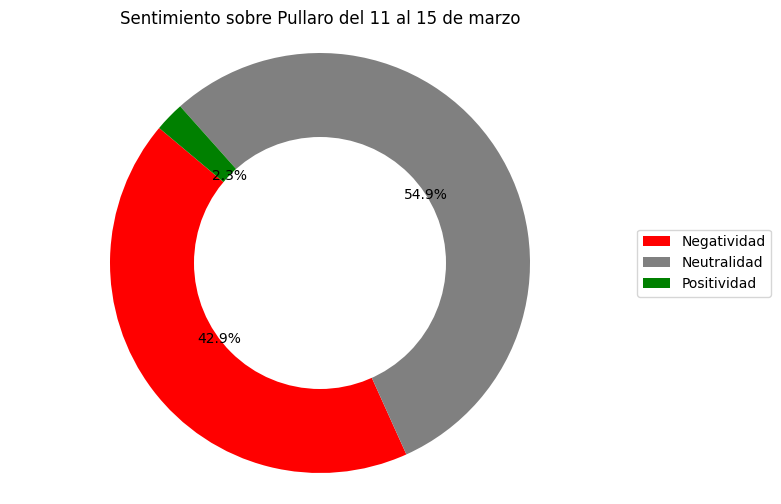

In [25]:
# Filtrar las variables con valores 0%
labels = ['Negatividad', 'Neutralidad', 'Positividad']
sizes = [porcentaje_negatividad, porcentaje_neutralidad, porcentaje_positividad]
colors = ['red', 'gray', 'green']

# Eliminar variables con valores 0%
sizes = [size for size, label in zip(sizes, labels) if size > 0]
labels = [label for size, label in zip(sizes, labels) if size > 0]
colors = [color for size, color in zip(sizes, colors) if size > 0]

# Graficar el resultado
plt.figure(figsize=(8, 6))
# No utilizar el parámetro explode
patches, texts, _ = plt.pie(sizes, colors=colors, startangle=140, autopct='%1.1f%%', wedgeprops=dict(width=0.6))

plt.title('Sentimiento sobre Pullaro del 11 al 15 de marzo')

# Colocar las etiquetas de datos dentro del color de cada variable
for text in texts:
    text.set_color('white')

# Crear leyenda para las variables
plt.legend(patches, labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Establecer el aspecto de la torta para que no haya separación de porciones
plt.gca().add_artist(plt.Circle((0,0),0.6,fc='white'))

plt.axis('equal')  # Asegurar que la torta esté dibujada como un círculo
plt.show()

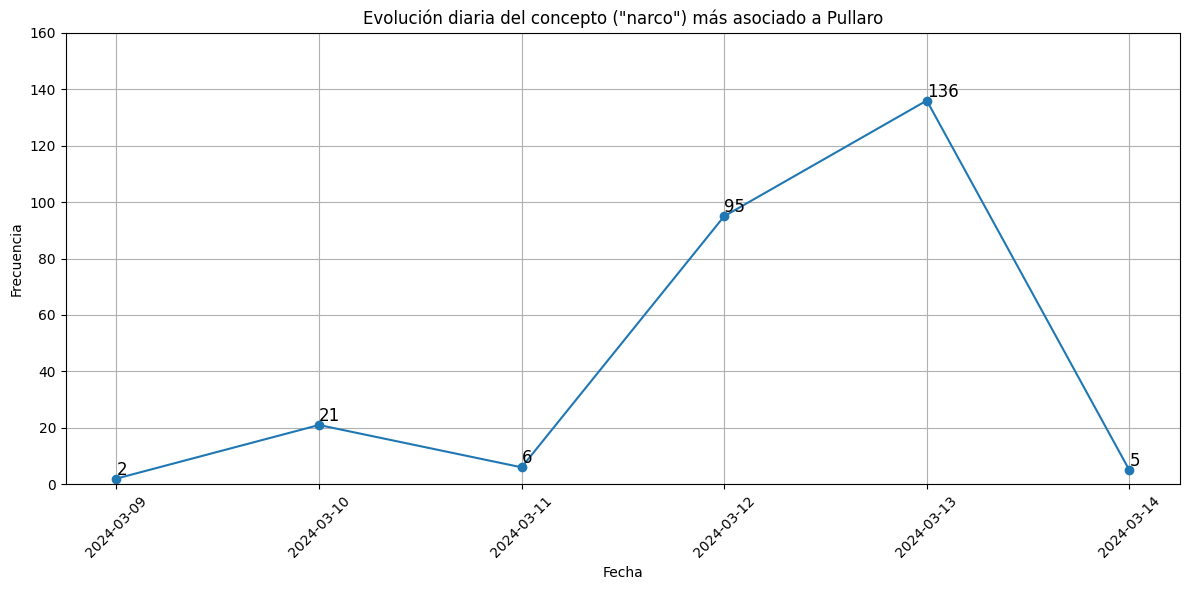

In [26]:
# Función para procesar el texto y extraer conceptos asociados a "pullaro"
def encontrar_conceptos(tweet_text):
    # Lista de palabras relevantes que queremos buscar
    conceptos = ['narco', 'rosario', 'milei', 'bullrich', 'gobernador',
                 'bukele', 'violencia', 'narcotráfico', 'ministro', 'show']  # Aquí puedes agregar más conceptos si es necesario

    # Inicializar un contador para contar la frecuencia de cada concepto
    contador_conceptos = Counter()

    # Convertir el texto a minúsculas para facilitar la búsqueda
    tweet_text = tweet_text.lower()

    # Buscar cada concepto en el texto y contar su frecuencia
    for concepto in conceptos:
        # Utilizar expresiones regulares para encontrar el concepto en el texto
        matches = re.findall(concepto.lower(), tweet_text)
        # Incrementar el contador si se encuentra el concepto
        contador_conceptos[concepto] += len(matches)

    return contador_conceptos

# Procesar la columna "tweet_texto" para encontrar los conceptos asociados a "pullaro"
df['Conceptos_por_tweet'] = df['Tweet_texto'].apply(encontrar_conceptos)

# Convertir la columna "Fecha_tweet" a tipo datetime
df['Fecha_tweet'] = pd.to_datetime(df['Fecha_tweet'])

# Agrupar los datos por fecha y sumar las frecuencias de los conceptos
df_grouped = df.groupby('Fecha_tweet')['Conceptos_por_tweet'].sum()

# Crear una nueva DataFrame con las frecuencias de los conceptos
df_conceptos = pd.DataFrame(df_grouped.tolist(), index=df_grouped.index)

# Seleccionar el concepto más común asociado a "pullaro"
concepto_mas_comun = df_conceptos.sum().idxmax()

# Crear el gráfico de líneas para mostrar la evolución diaria del concepto más común
plt.figure(figsize=(12, 6))
plt.plot(df_conceptos.index, df_conceptos[concepto_mas_comun], marker='o', linestyle='-')

# Agregar etiquetas de datos a los puntos de la línea
for fecha, frecuencia in zip(df_conceptos.index, df_conceptos[concepto_mas_comun]):
    plt.text(fecha, frecuencia, str(frecuencia), ha='left', va='bottom',fontsize=12)

plt.title('Evolución diaria del concepto ("narco") más asociado a Pullaro')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=45)

# Ajustar el eje Y para que llegue hasta el valor 160
plt.ylim(0, 160)

plt.tight_layout()
plt.show()

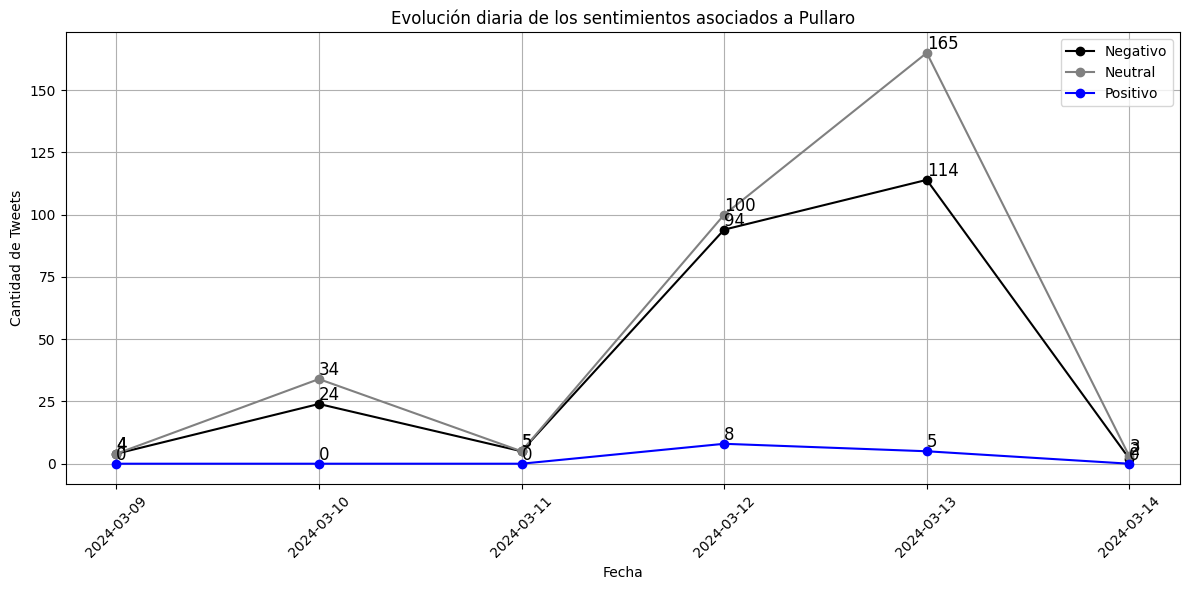

In [27]:
# Función para analizar el sentimiento de un texto y devolver la polaridad
def analizar_sentimiento(texto):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(texto)
    if sentiment['compound'] >= 0.05:
        return 'Positivo'
    elif sentiment['compound'] <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

# Suponiendo que tienes un DataFrame llamado df con la columna "Tweet_texto" y "Fecha_tweet"

# Filtrar los tweets que contienen la palabra "Pullaro"
tweets_pullaro = df[df['Tweet_texto'].str.contains('Pullaro', case=False)]

# Aplicar el análisis de sentimientos a cada tweet y obtener el sentimiento asociado
tweets_pullaro['Sentimiento'] = tweets_pullaro['Tweet_texto'].apply(analizar_sentimiento)

# Convertir la columna "Fecha_tweet" a tipo datetime
tweets_pullaro['Fecha_tweet'] = pd.to_datetime(tweets_pullaro['Fecha_tweet']).dt.date

# Contar la cantidad de tweets por cada categoría de sentimiento y por fecha
conteo_sentimientos_por_fecha = tweets_pullaro.groupby(['Fecha_tweet', 'Sentimiento']).size().unstack(fill_value=0)
# Crear el gráfico de líneas para mostrar la evolución diaria de los sentimientos
plt.figure(figsize=(12, 6))
for i, sentimiento in enumerate(conteo_sentimientos_por_fecha.columns):
    color = 'blue' if sentimiento == 'Positivo' else ('gray' if sentimiento == 'Neutral' else 'black')
    plt.plot(conteo_sentimientos_por_fecha.index, conteo_sentimientos_por_fecha[sentimiento], marker='o', linestyle='-', color=color, label=sentimiento)

    # Agregar etiquetas de datos a los puntos de la línea
    for fecha, cantidad in zip(conteo_sentimientos_por_fecha.index, conteo_sentimientos_por_fecha[sentimiento]):
        plt.text(fecha, cantidad, str(cantidad), ha='left', va='bottom', color='black',fontsize=12)  # Modificación del color aquí

plt.title('Evolución diaria de los sentimientos asociados a Pullaro')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()